In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [166]:
data = pd.read_csv("./apple_quality.csv")

data.drop(columns=['A_id'],inplace=True)

In [167]:
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [168]:
encoder = LabelEncoder()

data['Quality'] = encoder.fit_transform(data['Quality'])

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 234.5 KB


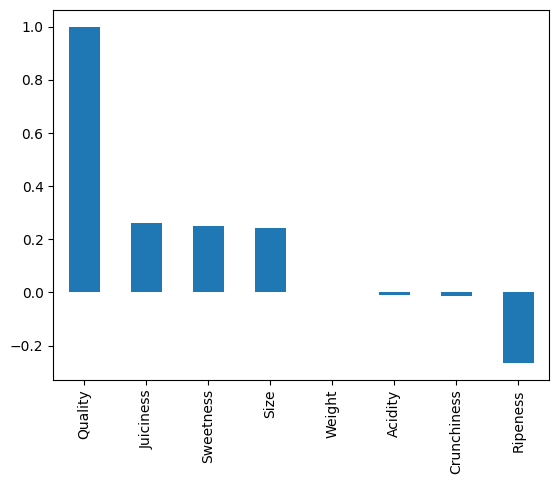

In [170]:
target_correlation = data.corr()['Quality']

target_correlation.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [171]:
target_correlation

Size           0.244007
Weight         0.001421
Sweetness      0.250998
Crunchiness   -0.012376
Juiciness      0.260223
Ripeness      -0.264315
Acidity       -0.007697
Quality        1.000000
Name: Quality, dtype: float64

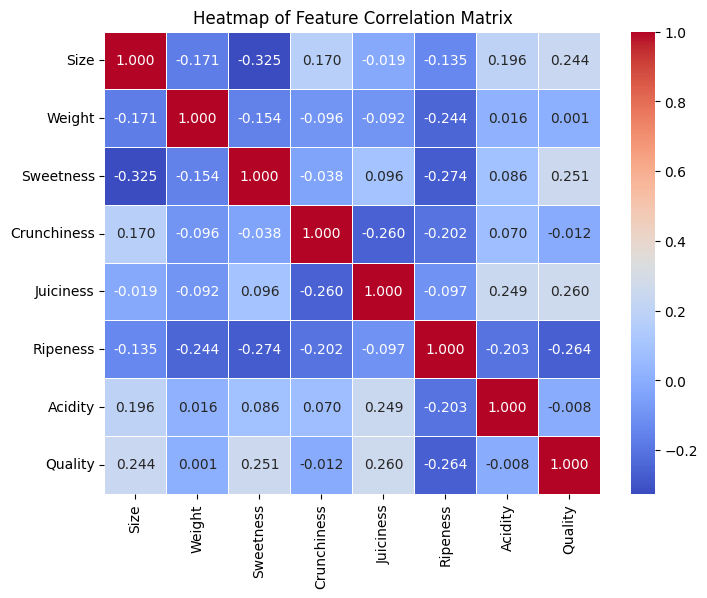

In [172]:
plt.figure(figsize=(8, 6))

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
plt.title('Heatmap of Feature Correlation Matrix')
plt.show()

### Pearson’s Correlation

In [173]:
feature = target_correlation[abs(target_correlation)>0.1]
feature

Size         0.244007
Sweetness    0.250998
Juiciness    0.260223
Ripeness    -0.264315
Quality      1.000000
Name: Quality, dtype: float64

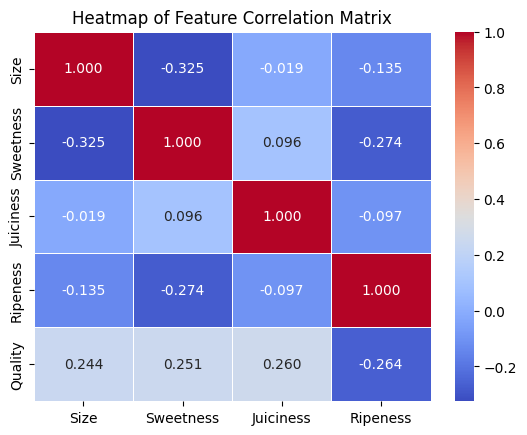

In [174]:
correlation_matrix = data[feature.index.to_list()].corr()
correlation_matrix

sns.heatmap(correlation_matrix.drop(columns=['Quality']), annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
plt.title('Heatmap of Feature Correlation Matrix')
plt.show()

Nilai sweetness dan size berkolerasi kuat dengan treshold 0.1 maka dapat dilakukan pemilihan salah satu dari kedua fitur tersebut untuk mewakiliki keduanya

In [230]:
# SELECTION FEATURE PART 2

selection_feature = data[correlation_matrix.index]
selection_feature.drop(columns=['Sweetness'],inplace=True)
selection_feature.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18504\3710629764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection_feature.drop(columns=['Sweetness'],inplace=True)


,Size,Juiciness,Ripeness,Quality
0,-3.970049,1.844900,0.329840,1
1,-1.195217,0.853286,0.867530,1
2,-0.292024,2.838636,-0.038033,0
3,-0.657196,3.637970,-3.413761,1
4,1.364217,3.030874,-1.303849,1


In [208]:
# SELECTION FEATURE PART 1

selection_feature = data[feature.index]
selection_feature.head()

,Size,Sweetness,Juiciness,Ripeness,Quality
0,-3.970049,5.346330,1.844900,0.329840,1
1,-1.195217,3.664059,0.853286,0.867530,1
2,-0.292024,-1.738429,2.838636,-0.038033,0
3,-0.657196,1.324874,3.637970,-3.413761,1
4,1.364217,-0.384658,3.030874,-1.303849,1


In [219]:
# FULL COLLUMN

selection_feature = data
selection_feature.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [235]:
from sklearn.model_selection import train_test_split

X = selection_feature.drop(columns=['Quality'])
y = selection_feature['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_normalization = scaler.fit_transform(X_train)
X_test_normalization = scaler.fit_transform(X_test)

In [237]:
from sklearn.linear_model import LogisticRegression     
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X_train_normalization, y_train)


LogisticRegression(random_state=42)

In [239]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [240]:
# Melakukan prediksi
y_pred = model.predict(X_test_normalization)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[284 117]
 [120 279]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       401
           1       0.70      0.70      0.70       399

    accuracy                           0.70       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.70      0.70      0.70       800


Accuracy Score: 0.70375


In [242]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [
    {
        'C': [0.5, 1, 10, 100],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    },
    {
        'C': [0.5, 1, 10, 100],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'coef0': [2.0, -1.0, -0.5, -0.1],
        'kernel': ['sigmoid']
    },
    {
        'C': [0.5, 1, 10, 100],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'coef0': [0.0, 0.1, 0.5, 1.0],
        'degree': [2, 3, 4],
        'kernel': ['poly']
    }
]

In [243]:
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)